In [99]:
from google.colab import drive
# mounting gdrive
drive.mount('/content/drive')
# importing data file from gdrive and reading csv data
import pandas as pd
data =pd.read_csv( '/content/drive/My Drive/Fraud.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Understanding the Data Set & Data Analysis

In [100]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [101]:
df=pd.DataFrame(data)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [102]:
df.shape

(6362620, 11)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [104]:
#missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [105]:
#check for duplicates
df.duplicated().sum()

0

In [106]:
# Z-score to detect
from scipy import stats

z_scores = stats.zscore(df["amount"])
z_scores

# Removing outliers
#df["amount"] = df[(z_scores < 3)]

0          -0.281560
1          -0.294767
2          -0.297555
3          -0.297555
4          -0.278532
             ...    
6362615     0.264665
6362616    10.153953
6362617    10.153953
6362618     1.109765
6362619     1.109765
Name: amount, Length: 6362620, dtype: float64

In [107]:
df.shape

(6362620, 11)

In [108]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [109]:
data.rename(columns={'newbalanceOrig':'newbalanceOrg'},inplace=True)

In [110]:
data.drop(labels=['nameOrig','nameDest'],axis=1,inplace=True)

In [111]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [112]:
# min values
data[[ 'amount','oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest']].min()

amount            0.0
oldbalanceOrg     0.0
newbalanceOrg     0.0
oldbalanceDest    0.0
newbalanceDest    0.0
dtype: float64

In [113]:
# max values
data[[ 'amount','oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest']].max()

amount            9.244552e+07
oldbalanceOrg     5.958504e+07
newbalanceOrg     4.958504e+07
oldbalanceDest    3.560159e+08
newbalanceDest    3.561793e+08
dtype: float64

*there is no unwanted data nor null data fields*

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
fraud = df.loc[df.isFraud == 1]
nonfraud = df.loc[df.isFraud == 0]

<ipython-input-116-fcd549c0938a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fraud.corr())


<Axes: >

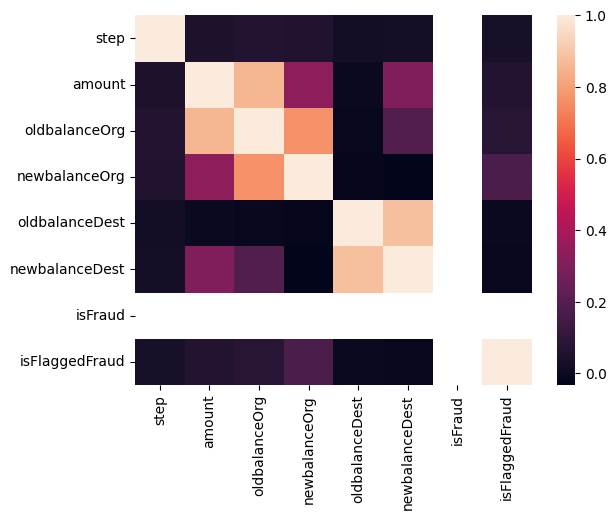

In [116]:
sns.heatmap(fraud.corr())

In [117]:
print('Fraud Transaction vs. Non_Fraud Transaction 1:{}'.format(int(nonfraud.isFraud.count()//fraud.isFraud.count())))

Fraud Transaction vs. Non_Fraud Transaction 1:773


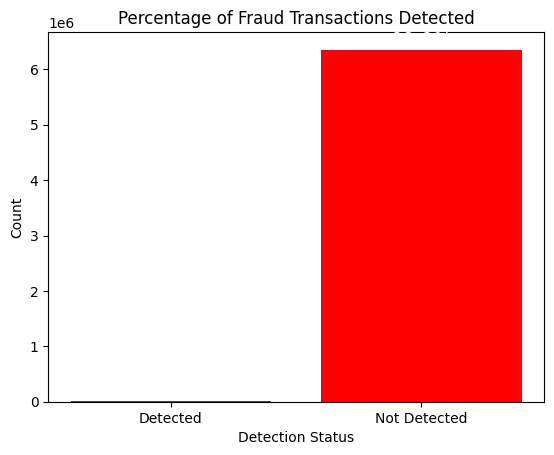

In [118]:
# Calculate the counts of detected and not detected fraud transactions
detected_count = df[df['isFraud'] == 1]['isFraud'].count()
not_detected_count = df[df['isFraud'] == 0]['isFraud'].count()

# Create a stacked bar chart
plt.bar(['Detected', 'Not Detected'], [detected_count, not_detected_count], color=['g', 'r'])

plt.title("Percentage of Fraud Transactions Detected")
plt.xlabel("Detection Status")
plt.ylabel("Count")
total_count = detected_count + not_detected_count
detected_percentage = (detected_count / total_count) * 100
not_detected_percentage = (not_detected_count / total_count) * 100

plt.text(0, detected_count, f"{detected_percentage:.1f}%", ha='center', va='bottom', fontsize=14, color='white')
plt.text(1, not_detected_count, f"{not_detected_percentage:.1f}%", ha='center', va='bottom', fontsize=14, color='white')
plt.show()


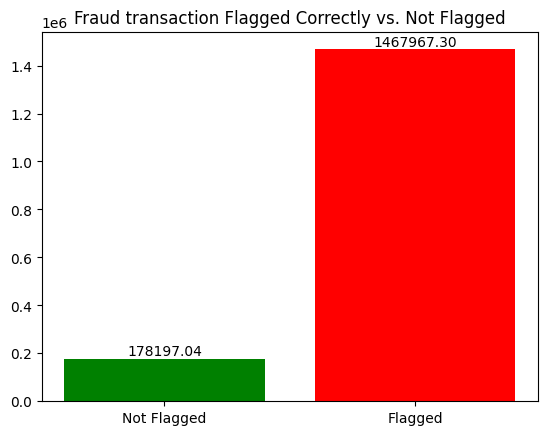

In [119]:
nonfraud_mean = nonfraud['amount'].mean()
fraud_mean = fraud['amount'].mean()
# Creating labels for the bars
labels = ['Not Flagged', 'Flagged']
values = [nonfraud_mean, fraud_mean]
plt.bar(labels, values, color=['g', 'r'])
plt.title("Fraud transaction Flagged Correctly vs. Not Flagged")

# Adding labels to the bars
for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')
plt.show()


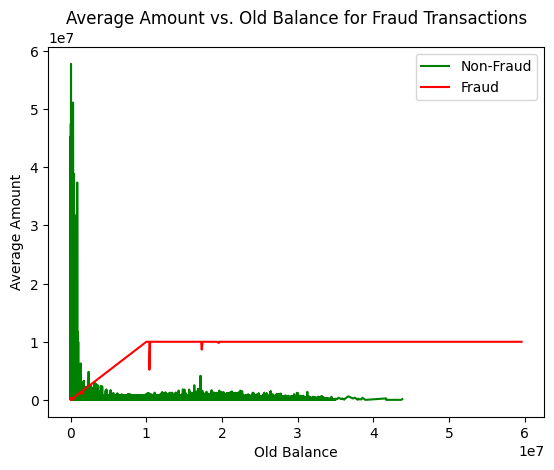

In [120]:
nonfraud_avg = nonfraud.groupby('oldbalanceOrg')['amount'].mean().reset_index()
# Calculating the average 'amount' for each 'oldbalanceOrg' for fraud transactions
fraud_avg = fraud.groupby('oldbalanceOrg')['amount'].mean().reset_index()

# Creating a line graph for non-fraud transactions
plt.plot(nonfraud_avg['oldbalanceOrg'], nonfraud_avg['amount'], label='Non-Fraud', c='g')
# Creating a line graph for fraud transactions
plt.plot(fraud_avg['oldbalanceOrg'], fraud_avg['amount'], label='Fraud', c='r')
plt.title("Average Amount vs. Old Balance for Fraud Transactions")
plt.xlabel("Old Balance")
plt.ylabel("Average Amount")
plt.legend()
plt.show()


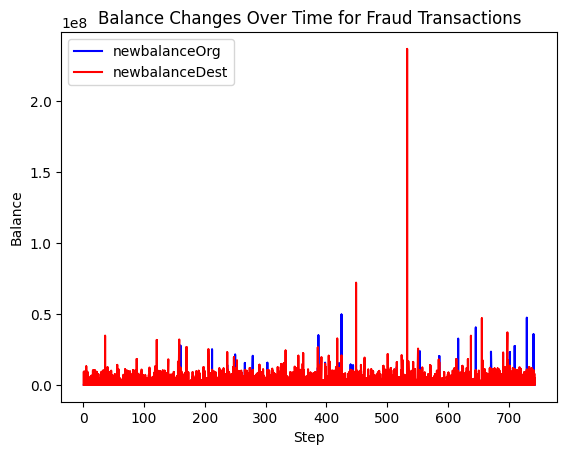

In [121]:
fraud_sorted = fraud.sort_values(by='step')

# Creating a line plot for 'newbalanceOrg'
plt.plot(fraud_sorted['step'], fraud_sorted['newbalanceOrg'], label='newbalanceOrg', c='b')
# Creating a line plot for 'newbalanceDest'
plt.plot(fraud_sorted['step'], fraud_sorted['newbalanceDest'], label='newbalanceDest', c='r')


plt.title("Balance Changes Over Time for Fraud Transactions")
plt.xlabel("Step")
plt.ylabel("Balance")
plt.legend()
plt.show()


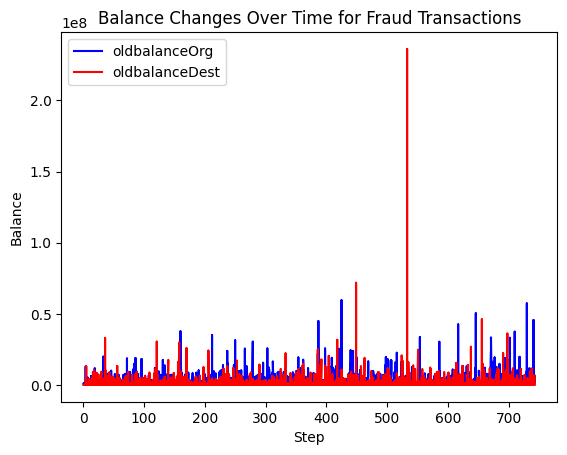

In [122]:
fraud_sorted = fraud.sort_values(by='step')

# Creating a line plot for 'oldbalanceOrg'
plt.plot(fraud_sorted['step'], fraud_sorted['oldbalanceOrg'], label='oldbalanceOrg', c='b')
# Creating a line plot for 'oldbalanceDest'
plt.plot(fraud_sorted['step'], fraud_sorted['oldbalanceDest'], label='oldbalanceDest', c='r')


plt.title("Balance Changes Over Time for Fraud Transactions")
plt.xlabel("Step")
plt.ylabel("Balance")
plt.legend()
plt.show()


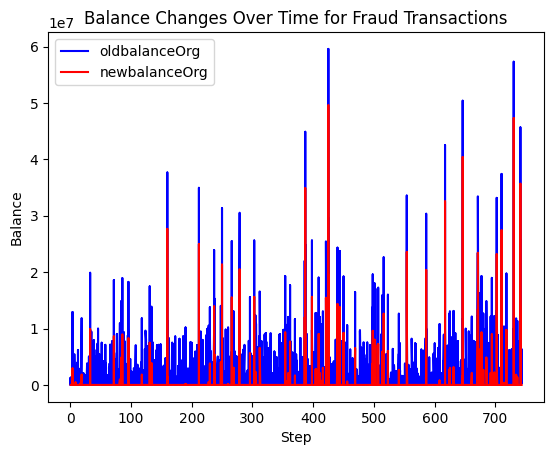

In [123]:
fraud_sorted = fraud.sort_values(by='step')

# Creating a line plot for 'oldbalanceOrg'
plt.plot(fraud_sorted['step'], fraud_sorted['oldbalanceOrg'], label='oldbalanceOrg', c='b')
# Creating a line plot for 'newbalanceOrg'
plt.plot(fraud_sorted['step'], fraud_sorted['newbalanceOrg'], label='newbalanceOrg', c='r')


plt.title("Balance Changes Over Time for Fraud Transactions")
plt.xlabel("Step")
plt.ylabel("Balance")
plt.legend()
plt.show()

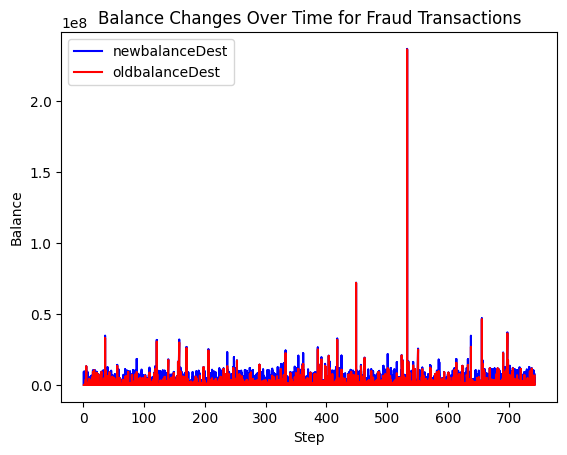

In [124]:
fraud_sorted = fraud.sort_values(by='step')

# Creating a line plot for 'newbalanceDest'
plt.plot(fraud_sorted['step'], fraud_sorted['newbalanceDest'], label='newbalanceDest', c='b')
# Creating a line plot for 'oldbalanceDest'
plt.plot(fraud_sorted['step'], fraud_sorted['oldbalanceDest'], label='oldbalanceDest', c='r')


plt.title("Balance Changes Over Time for Fraud Transactions")
plt.xlabel("Step")
plt.ylabel("Balance")
plt.legend()
plt.show()

#Data Cleaning

In [125]:
import pandas as pd
import numpy as np
import pickle

In [126]:
#Creating new dataset to keep the integrity of the orginal data
df1=df

In [127]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [128]:
#Converting Categorical data into Numerical format
from sklearn.preprocessing import LabelEncoder
"""categorical_cols=df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])"""
label_encoder = LabelEncoder()
df1['type'] = label_encoder.fit_transform(df1['type'])
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [129]:
df1.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [130]:
df1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [131]:
X = df1.drop(['isFraud'],axis=1)
y = df1[['isFraud']]

#Splitting Data & Building ML model

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)
model = LogisticRegression(random_state=121)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy:', accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.9982082852661325


Notes :

OldbalanceOrg and NewbalanceOrg are highly correlated.
OldbalanceDest and NewbalanceDest are highly correlated.
Amount is correlated with isFraud(Target Variable).

every 773 transaction there is 1 fraud transaction happening

